# **SUBSCRIBE to the [channel](https://www.youtube.com/user/19daredevill?sub_confirmation=1) to learn cool things**

![Subscribe](https://media3.giphy.com/media/XGILFirobxDWglaUyj/giphy.gif?cid=ecf05e474afdd7ef5fe2c0fa50f87822d705fbb2613a3b5c&rid=giphy.gif)

In [ ]:
!git clone https://github.com/misbah4064/human-pose-estimation-opencv.git
%cd human-pose-estimation-opencv/

Cloning into 'human-pose-estimation-opencv'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (20/20), done.
/content/human-pose-estimation-opencv


In [20]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 368
height = 368
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("/content/drive/MyDrive/Dataset/PoseDetection/graph_opt.pb")
thr = 0.2

def poseDetector(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()

    return frame

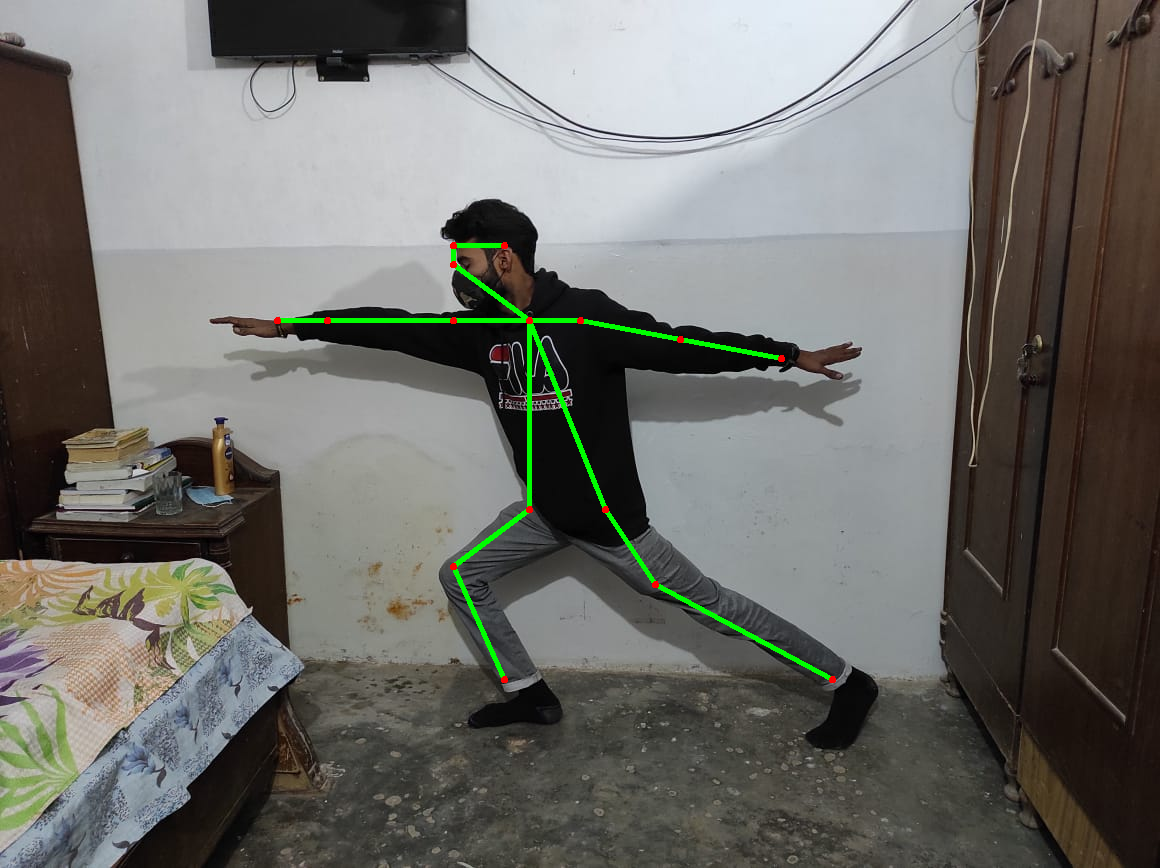

In [25]:
input = cv.imread("/content/img48.jpeg")
output = poseDetector(input)
cv2_imshow(output)

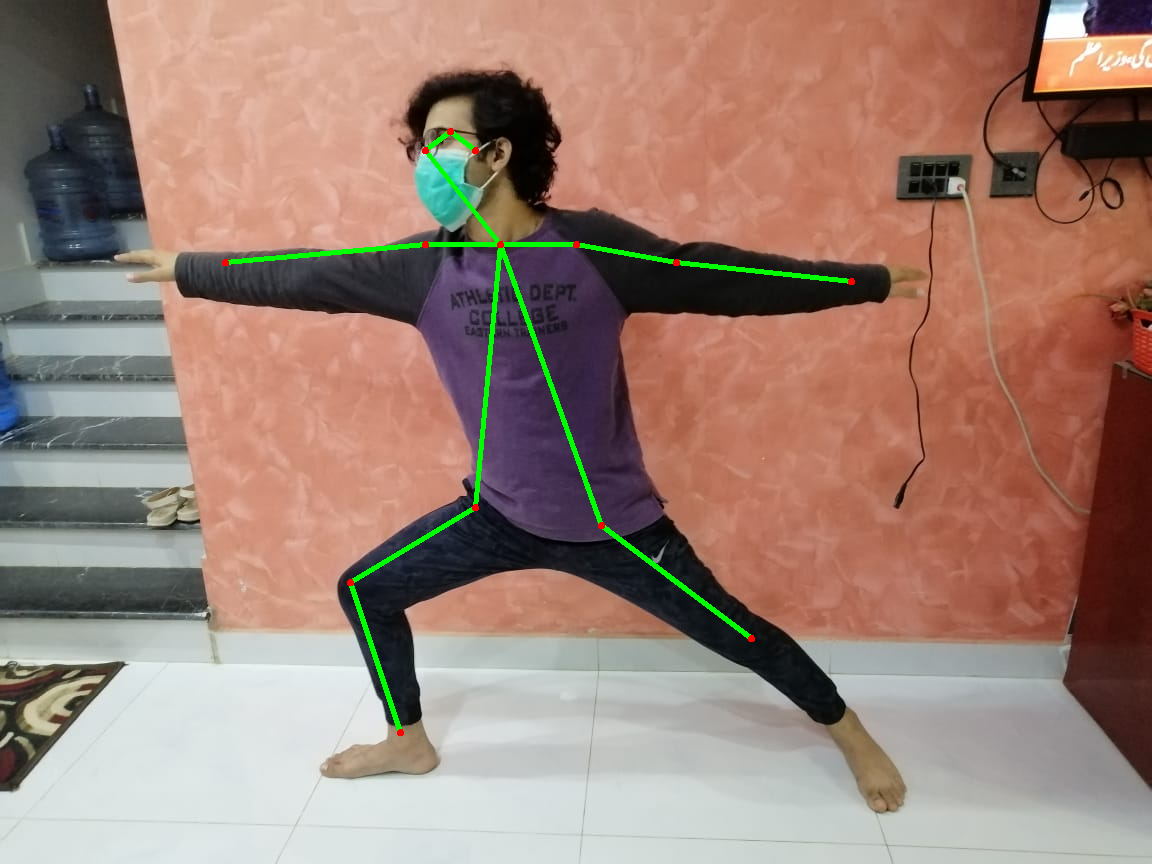

In [7]:
input = cv.imread("/content/WhatsApp Image 2020-11-16 at 9.17.52 PM (2).jpeg")
output = poseDetector(input)
cv2_imshow(output)

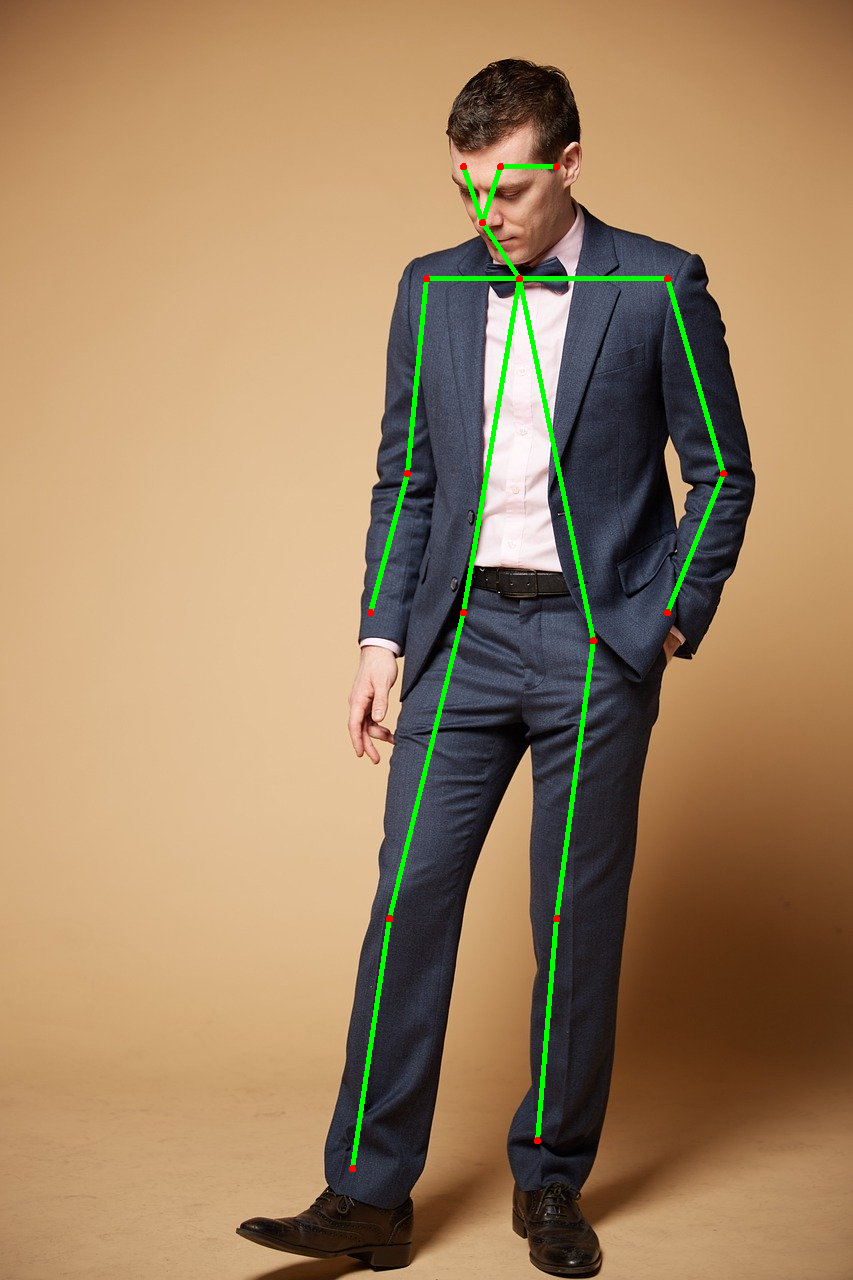

In [ ]:
input = cv.imread("image2.jpg")
output = poseDetector(input)
cv2_imshow(output)

In [ ]:
import cv2
cap = cv2.VideoCapture('dance.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = poseDetector(frame)
  out.write(output)
out.release()
print("Done processing video")

Processing Video...
Done processing video


In [ ]:
import cv2 as cv
import numpy as np
import argparse

parser = argparse.ArgumentParser(
        description='This script is used to demonstrate OpenPose human pose estimation network '
                    'from https://github.com/CMU-Perceptual-Computing-Lab/openpose project using OpenCV. '
                    'The sample and model are simplified and could be used for a single person on the frame.')
parser.add_argument('--input', help='Path to image or video. Skip to capture frames from camera')
parser.add_argument('--proto', help='Path to .prototxt')
parser.add_argument('--model', help='Path to .caffemodel')
parser.add_argument('--dataset', help='Specify what kind of model was trained. '
                                      'It could be (COCO, MPI, HAND) depends on dataset.')
parser.add_argument('--thr', default=0.1, type=float, help='Threshold value for pose parts heat map')
parser.add_argument('--width', default=368, type=int, help='Resize input to specific width.')
parser.add_argument('--height', default=368, type=int, help='Resize input to specific height.')
parser.add_argument('--scale', default=0.003922, type=float, help='Scale for blob.')

args = parser.parse_args()

if args.dataset == 'COCO':
    BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                   "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                   "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
                   "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

    POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
                   ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
                   ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
                   ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
                   ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]
elif args.dataset == 'MPI':
    BODY_PARTS = { "Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                   "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                   "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
                   "Background": 15 }

    POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
                   ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
                   ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
                   ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]
else:
    assert(args.dataset == 'HAND')
    BODY_PARTS = { "Wrist": 0,
                   "ThumbMetacarpal": 1, "ThumbProximal": 2, "ThumbMiddle": 3, "ThumbDistal": 4,
                   "IndexFingerMetacarpal": 5, "IndexFingerProximal": 6, "IndexFingerMiddle": 7, "IndexFingerDistal": 8,
                   "MiddleFingerMetacarpal": 9, "MiddleFingerProximal": 10, "MiddleFingerMiddle": 11, "MiddleFingerDistal": 12,
                   "RingFingerMetacarpal": 13, "RingFingerProximal": 14, "RingFingerMiddle": 15, "RingFingerDistal": 16,
                   "LittleFingerMetacarpal": 17, "LittleFingerProximal": 18, "LittleFingerMiddle": 19, "LittleFingerDistal": 20,
                 }

    POSE_PAIRS = [ ["Wrist", "ThumbMetacarpal"], ["ThumbMetacarpal", "ThumbProximal"],
                   ["ThumbProximal", "ThumbMiddle"], ["ThumbMiddle", "ThumbDistal"],
                   ["Wrist", "IndexFingerMetacarpal"], ["IndexFingerMetacarpal", "IndexFingerProximal"],
                   ["IndexFingerProximal", "IndexFingerMiddle"], ["IndexFingerMiddle", "IndexFingerDistal"],
                   ["Wrist", "MiddleFingerMetacarpal"], ["MiddleFingerMetacarpal", "MiddleFingerProximal"],
                   ["MiddleFingerProximal", "MiddleFingerMiddle"], ["MiddleFingerMiddle", "MiddleFingerDistal"],
                   ["Wrist", "RingFingerMetacarpal"], ["RingFingerMetacarpal", "RingFingerProximal"],
                   ["RingFingerProximal", "RingFingerMiddle"], ["RingFingerMiddle", "RingFingerDistal"],
                   ["Wrist", "LittleFingerMetacarpal"], ["LittleFingerMetacarpal", "LittleFingerProximal"],
                   ["LittleFingerProximal", "LittleFingerMiddle"], ["LittleFingerMiddle", "LittleFingerDistal"] ]


inWidth = args.width
inHeight = args.height
inScale = args.scale

net = cv.dnn.readNet(cv.samples.findFile(args.proto), cv.samples.findFile(args.model))

cap = cv.VideoCapture(args.input if args.input else 0)

while cv.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv.waitKey()
        break

    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    inp = cv.dnn.blobFromImage(frame, inScale, (inWidth, inHeight),
                              (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inp)
    out = net.forward()

    assert(len(BODY_PARTS) <= out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > args.thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    cv.imshow('OpenPose using OpenCV', frame)

usage: ipykernel_launcher.py [-h] [--input INPUT] [--proto PROTO]
                             [--model MODEL] [--dataset DATASET] [--thr THR]
                             [--width WIDTH] [--height HEIGHT] [--scale SCALE]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-77aebcdd-6a5a-499c-ba06-d4e982de648e.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
input = cv.imread("/content/image-00dd_0_873.jpg")
output = poseDetector(input)
cv2_imshow(output)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("drive mount")

Mounted at /content/drive
drive mount
